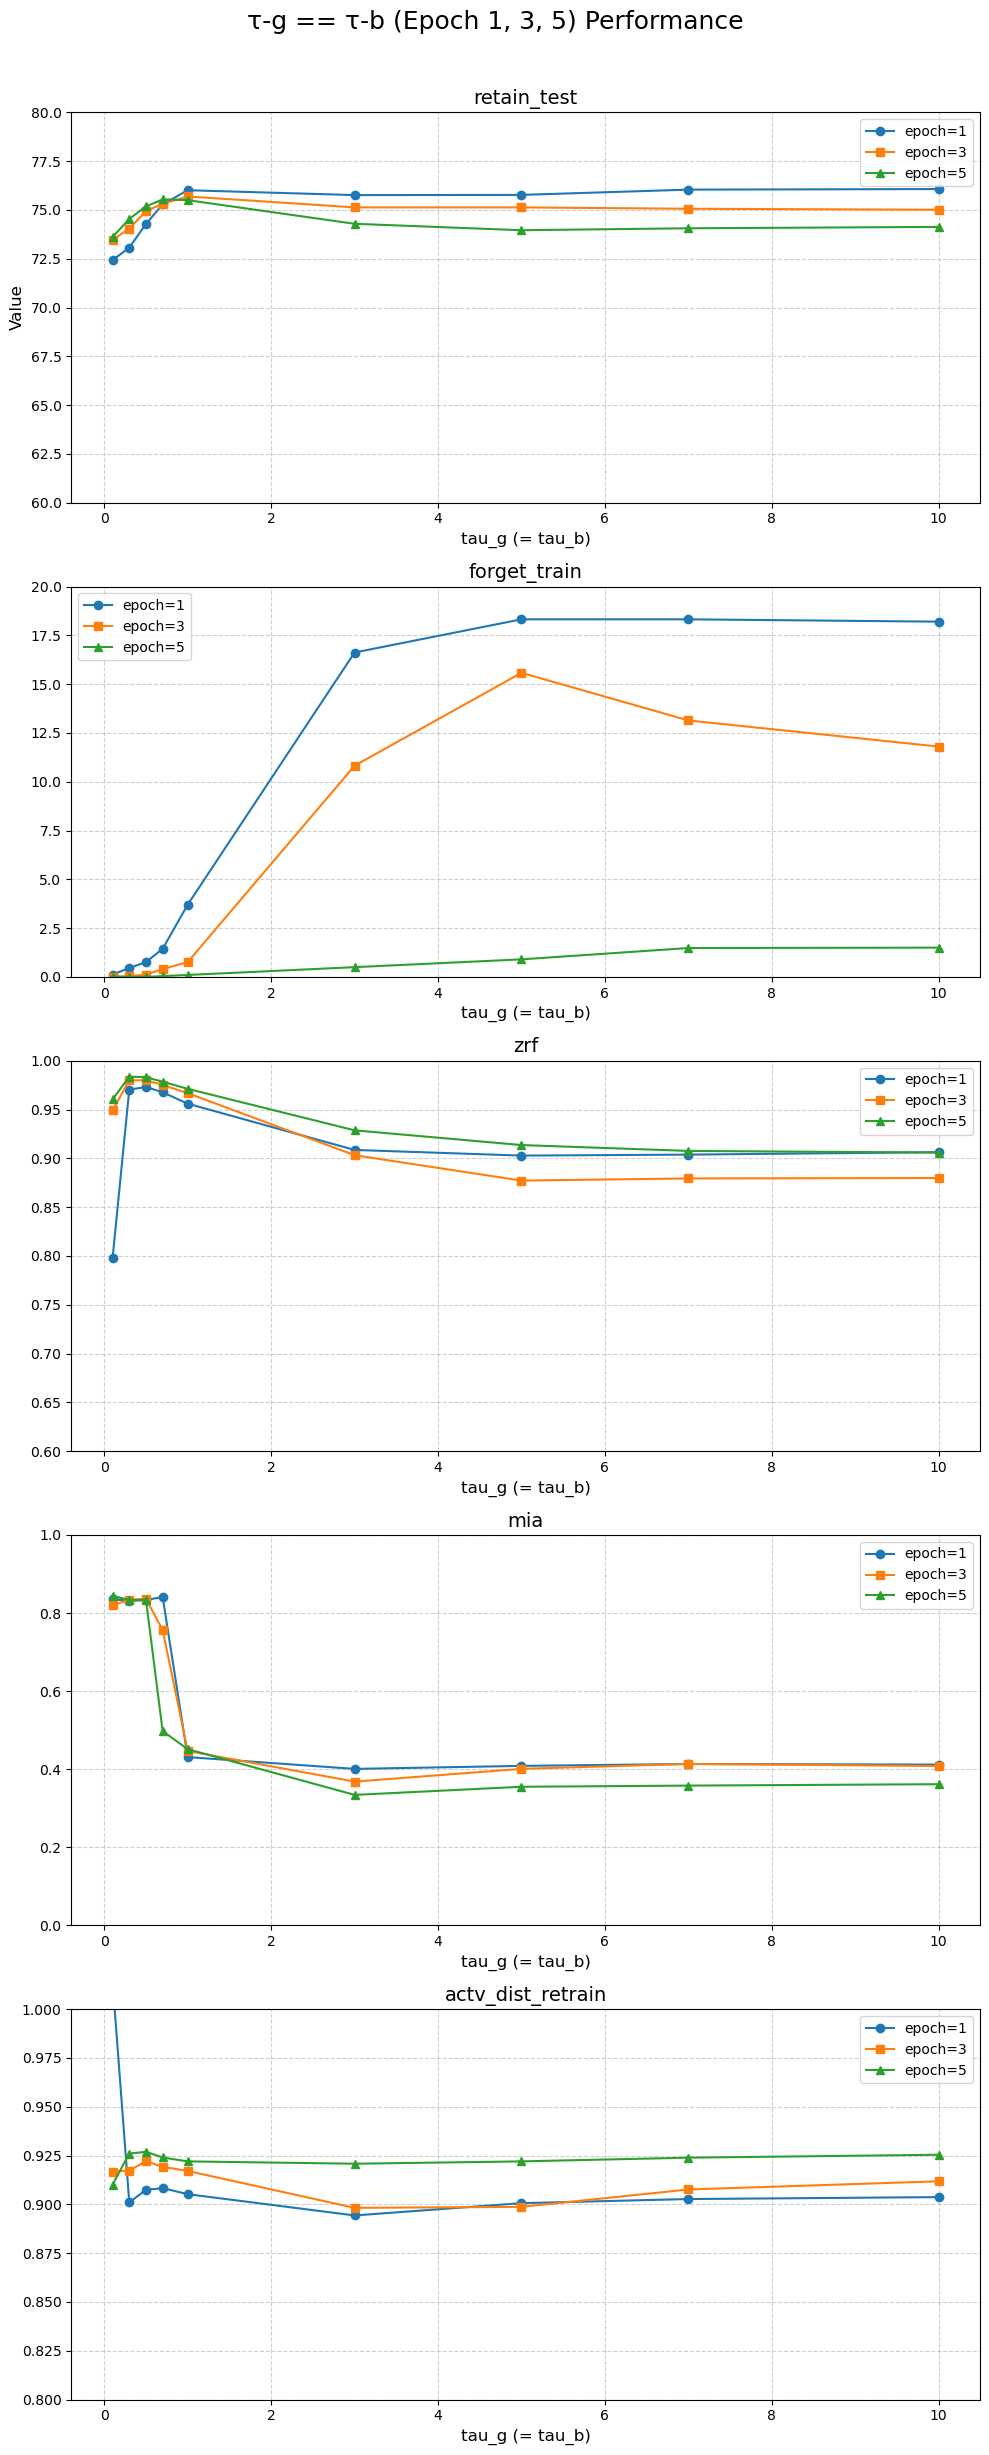

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# ===== 1. 데이터 불러오기 =====
path = '/root/Public_Storage/madelab_khw/ksc_unlearning/tau_unlearn.csv'
data = pd.read_csv(path)

# ===== 2. tau_g == tau_b인 데이터만 필터링 =====
data_eq = data[data["tau_g"] == data["tau_b"]]

# ===== 3. Epoch별 subset =====
data_epoch_1 = data_eq[data_eq["epochs"] == 1]
data_epoch_3 = data_eq[data_eq["epochs"] == 3]
data_epoch_5 = data_eq[data_eq["epochs"] == 5]

# ===== 4. 시각화 (5행 1열) =====
metrics = ["retain_test", "forget_train", "zrf", "mia", "actv_dist_retrain"]
scales  = {"retain_test":(60,80),
           "forget_train":(0,20),
           "zrf":(0.6, 1),
           "mia":(0,1),
           "actv_dist_retrain":(0.8,1)}

fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 25))

for i, m in enumerate(metrics):
    ax = axes[i]
    ax.plot(data_epoch_1["tau_g"], data_epoch_1[m], marker='o', label="epoch=1")
    ax.plot(data_epoch_3["tau_g"], data_epoch_3[m], marker='s', label="epoch=3")
    ax.plot(data_epoch_5["tau_g"], data_epoch_5[m], marker='^', label="epoch=5")

    ax.set_title(m, fontsize=14)
    ax.set_xlabel("tau_g (= tau_b)", fontsize=12)
    ax.set_ylim(scales[m])   # metric별 스케일 적용
    ax.grid(True, linestyle="--", alpha=0.6)

    if i == 0:
        ax.set_ylabel("Value", fontsize=12)
    ax.legend()

plt.suptitle("τ-g == τ-b (Epoch 1, 3, 5) Performance", fontsize=18)
plt.tight_layout(rect=[0,0,1,0.97])  # 제목 안겹치게
plt.show()


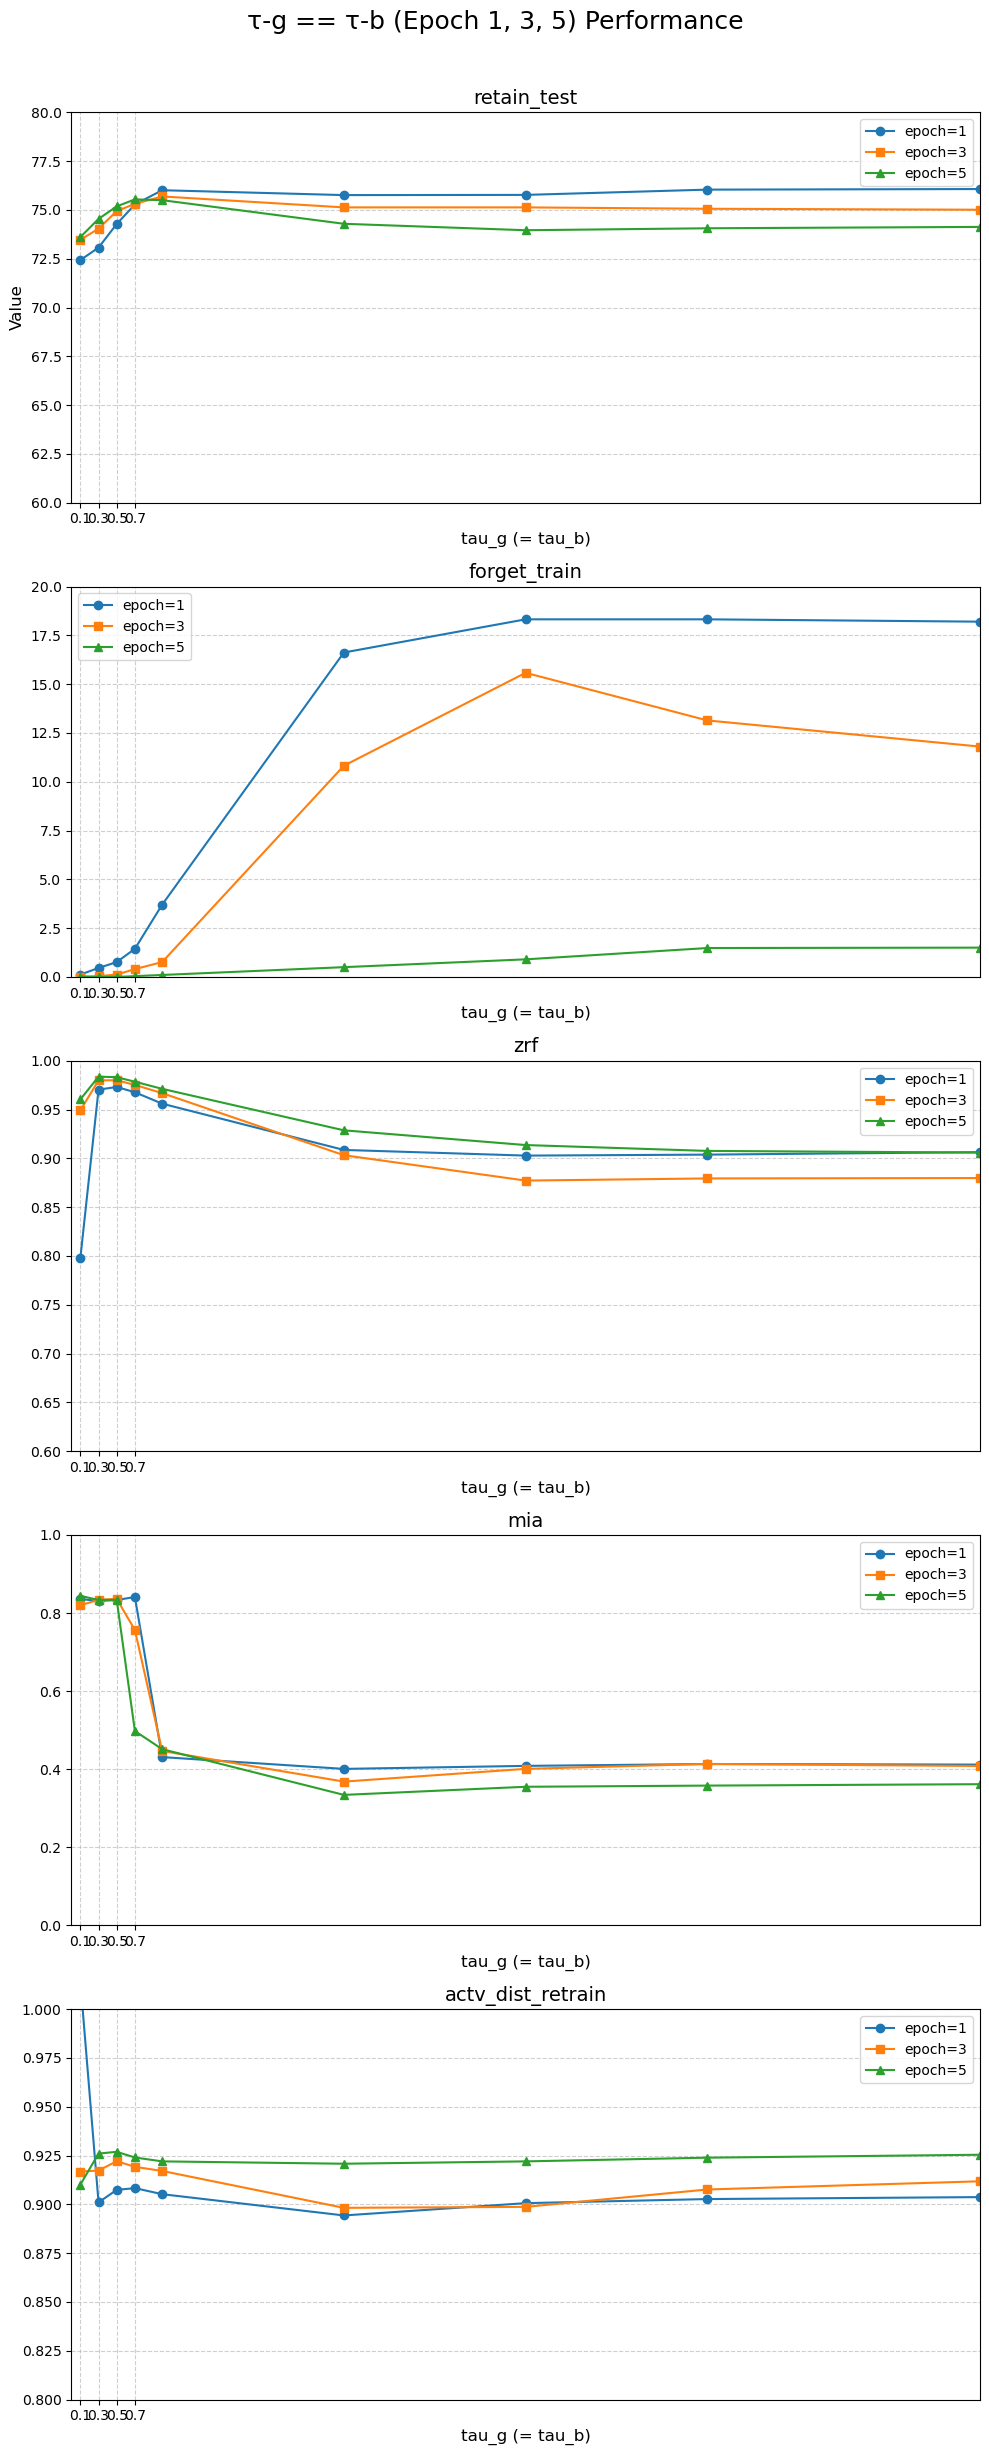

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# ===== 1. 데이터 불러오기 =====
path = '/root/Public_Storage/madelab_khw/ksc_unlearning/tau_unlearn.csv'
data = pd.read_csv(path)

# ===== 2. tau_g == tau_b인 데이터만 필터링 =====
data_eq = data[data["tau_g"] == data["tau_b"]]

# ===== 3. Epoch별 subset =====
data_epoch_1 = data_eq[data_eq["epochs"] == 1]
data_epoch_3 = data_eq[data_eq["epochs"] == 3]
data_epoch_5 = data_eq[data_eq["epochs"] == 5]

# ===== 4. 시각화 (5행 1열) =====
metrics = ["retain_test", "forget_train", "zrf", "mia", "actv_dist_retrain"]
scales  = {"retain_test":(60,80),
           "forget_train":(0,20),
           "zrf":(0.6, 1),
           "mia":(0,1),
           "actv_dist_retrain":(0.8,1)}

# 🔥 x축 눈금 (0~2 구간에서 원하는 값 지정)
xticks_custom = [0.1, 0.3, 0.5, 0.7]

fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 25))

for i, m in enumerate(metrics):
    ax = axes[i]
    ax.plot(data_epoch_1["tau_g"], data_epoch_1[m], marker='o', label="epoch=1")
    ax.plot(data_epoch_3["tau_g"], data_epoch_3[m], marker='s', label="epoch=3")
    ax.plot(data_epoch_5["tau_g"], data_epoch_5[m], marker='^', label="epoch=5")

    ax.set_title(m, fontsize=14)
    ax.set_xlabel("tau_g (= tau_b)", fontsize=12)
    ax.set_ylim(scales[m])   
    ax.set_xlim(0, 10)                      # x축 0~2 범위
    ax.set_xticks(xticks_custom)           # 🔥 지정한 눈금만 표시
    ax.grid(True, linestyle="--", alpha=0.6)

    if i == 0:
        ax.set_ylabel("Value", fontsize=12)
    ax.legend()

plt.suptitle("τ-g == τ-b (Epoch 1, 3, 5) Performance", fontsize=18)
plt.tight_layout(rect=[0,0,1,0.97])  
plt.show()


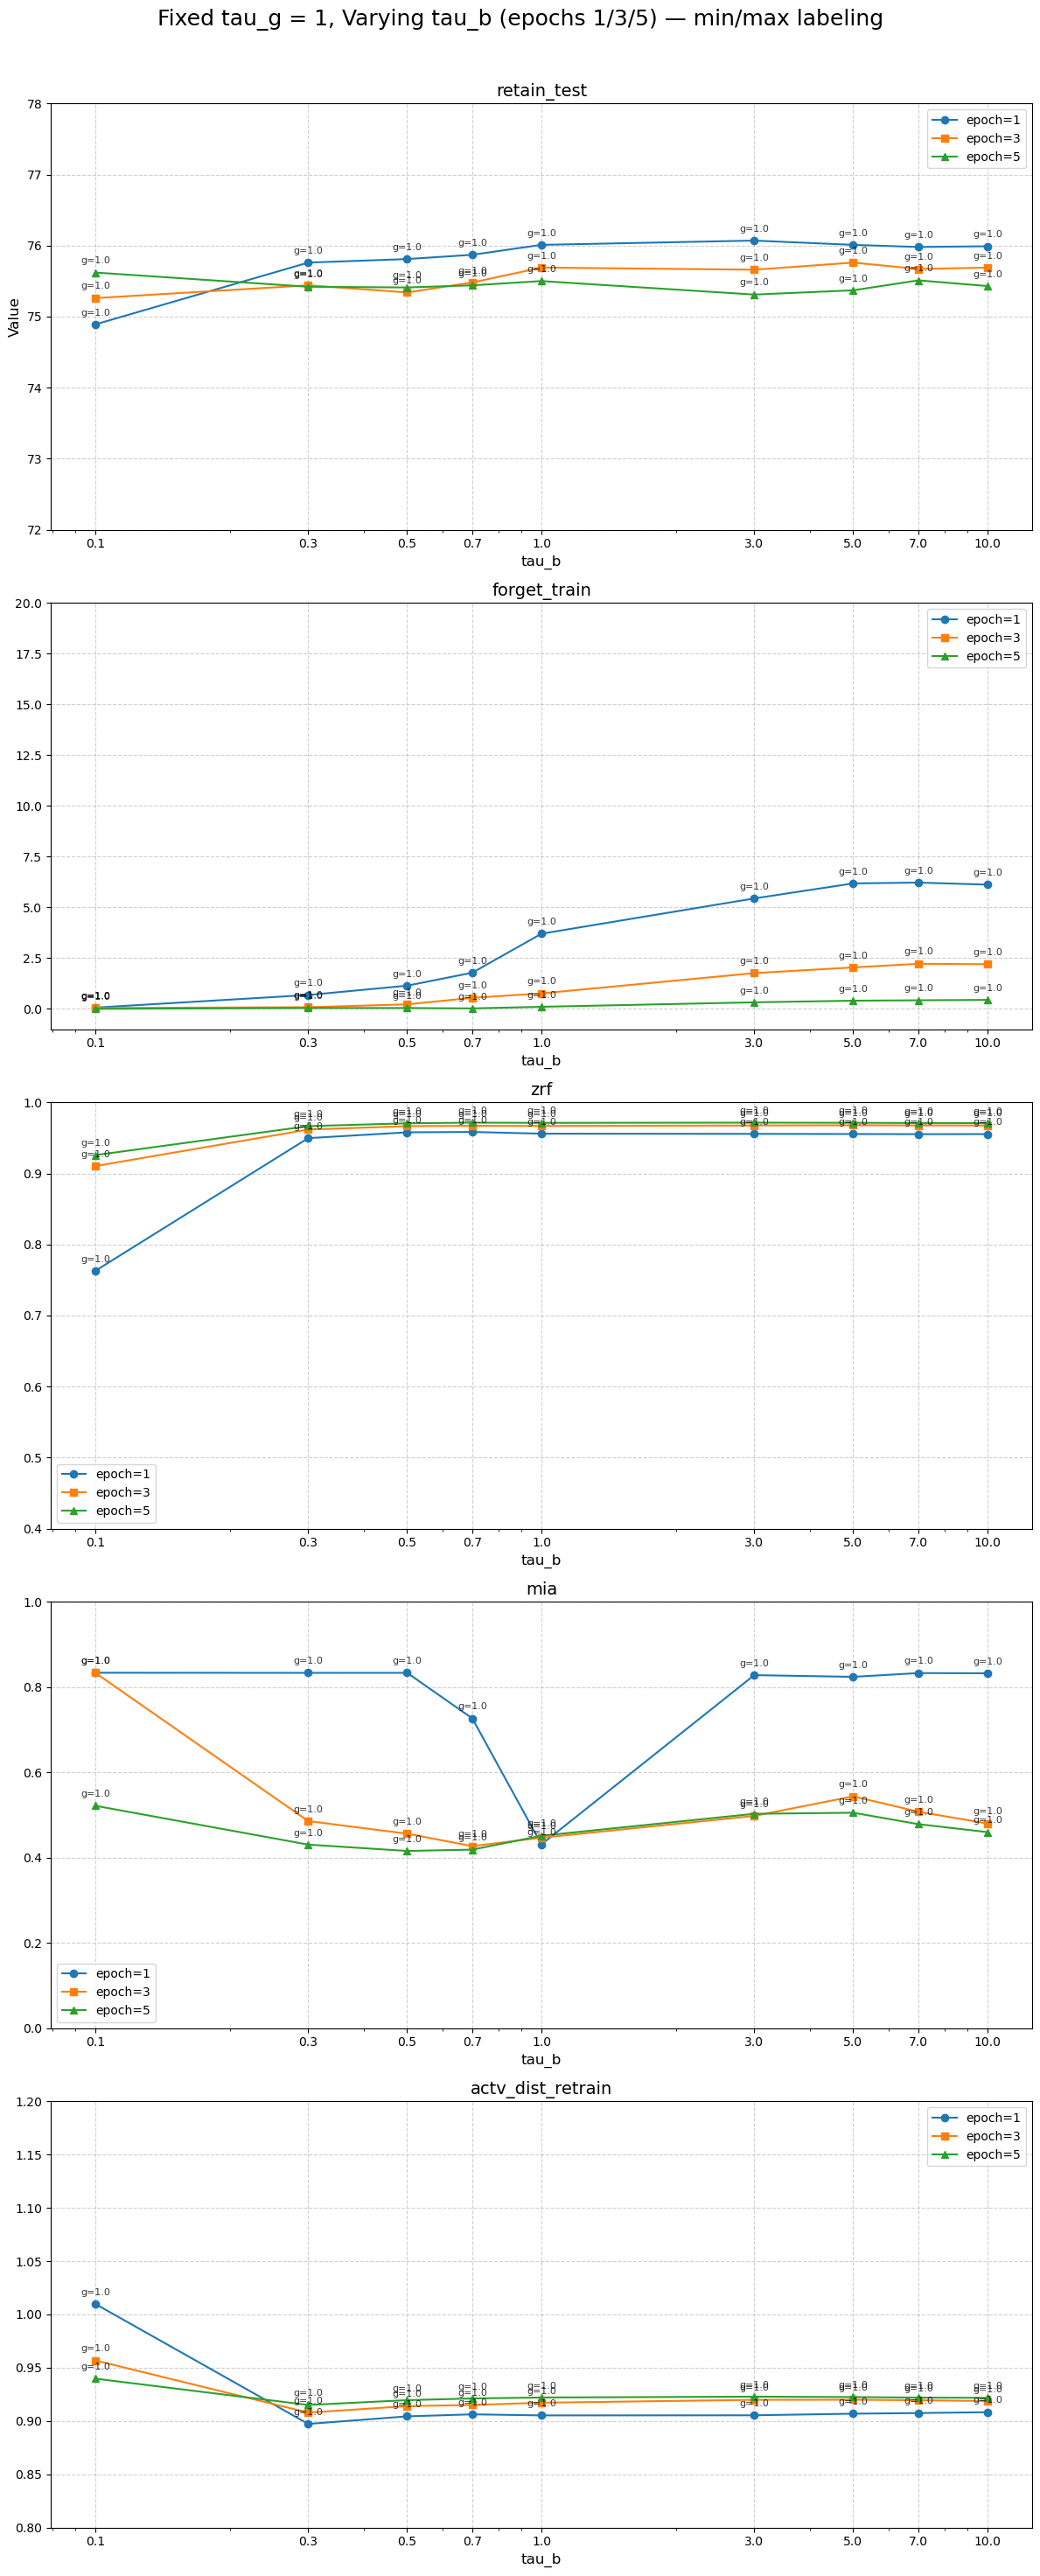

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = '/root/Public_Storage/madelab_khw/kd_tau_class/tau_unlearn.csv'
data = pd.read_csv(path)

# Public_Storage/madelab_khw/kd_tau_class/tau_unlearn.csv

# good_teacher_tau 고정, bad_teacher_tau 변화
good_tau_value = 1
filtered_data = data[data["tau_g"] == good_tau_value].copy()

# epoch별 서브셋
sub = {ep: filtered_data[filtered_data["epochs"] == ep] for ep in [1, 3, 5]}

metrics = ["retain_test", "forget_train", "zrf", "mia", "actv_dist_retrain"]
scales = {
    "retain_test": (72, 78),
    "forget_train": (-1, 20),
    "zrf": (0.4, 1),
    "mia": (0, 1),
    "actv_dist_retrain": (0.8, 1.2),
}

# 보기 좋은 눈금
xticks = [0.1, 0.3, 0.5, 0.7, 1, 3, 5, 7, 10]

# 그래프 크기 설정
fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 30))

markers = {1: "o-", 3: "s-", 5: "^-"}

# 그래프 그리기
for i, m in enumerate(metrics):
    ax = axes[i]

    for ep in [1, 3, 5]:
        df = sub[ep]
        if df.empty:
            continue

        # x오프셋 적용 (tau_g는 고정이므로 x축에는 tau_b만 변화)
        x = df["tau_b"].astype(float).values  # tau_b 값만 변화
        y = df[m].astype(float).values

        ax.plot(x, y, markers[ep], label=f"epoch={ep}")

        # 라벨: tau_b별로 min/max tau_g만 표시
        g = df.groupby("tau_b", as_index=False)
        to_label = []
        for tau_b, gdf in g:
            if gdf.empty:
                continue
            idx_min = gdf["tau_g"].idxmin()
            idx_max = gdf["tau_g"].idxmax()
            to_label.extend([idx_min, idx_max])

        labeled = df.loc[sorted(set(to_label))].copy()
        # 라벨 배치: max는 위로, min은 아래로
        for _, r in labeled.iterrows():
            xx = float(r["tau_b"])  # tau_b를 x축으로 사용
            yy = float(r[m])
            is_max = r["tau_g"] == df[df["tau_b"] == r["tau_b"]]["tau_g"].max()
            dy = 6 if is_max else -10  # offset points
            ax.annotate(f"g={r['tau_g']}", xy=(xx, yy),
                        xytext=(0, dy), textcoords="offset points",
                        ha="center", va="bottom" if is_max else "top",
                        fontsize=8, alpha=0.8, clip_on=True)

    ax.set_title(m, fontsize=14)
    ax.set_xlabel("tau_b", fontsize=12)  # tau_b 값 변화
    ax.set_ylim(scales[m])
    ax.set_xscale("log")  # tau 값 폭이 크면 로그축이 보기 좋음
    ax.set_xticks(xticks)
    ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())  # 로그축에서도 숫자 그대로 표시
    
    ax.grid(True, linestyle="--", alpha=0.6)
    if i == 0:
        ax.set_ylabel("Value", fontsize=12)
    ax.legend()

plt.suptitle("Fixed tau_g = 1, Varying tau_b (epochs 1/3/5) — min/max labeling", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


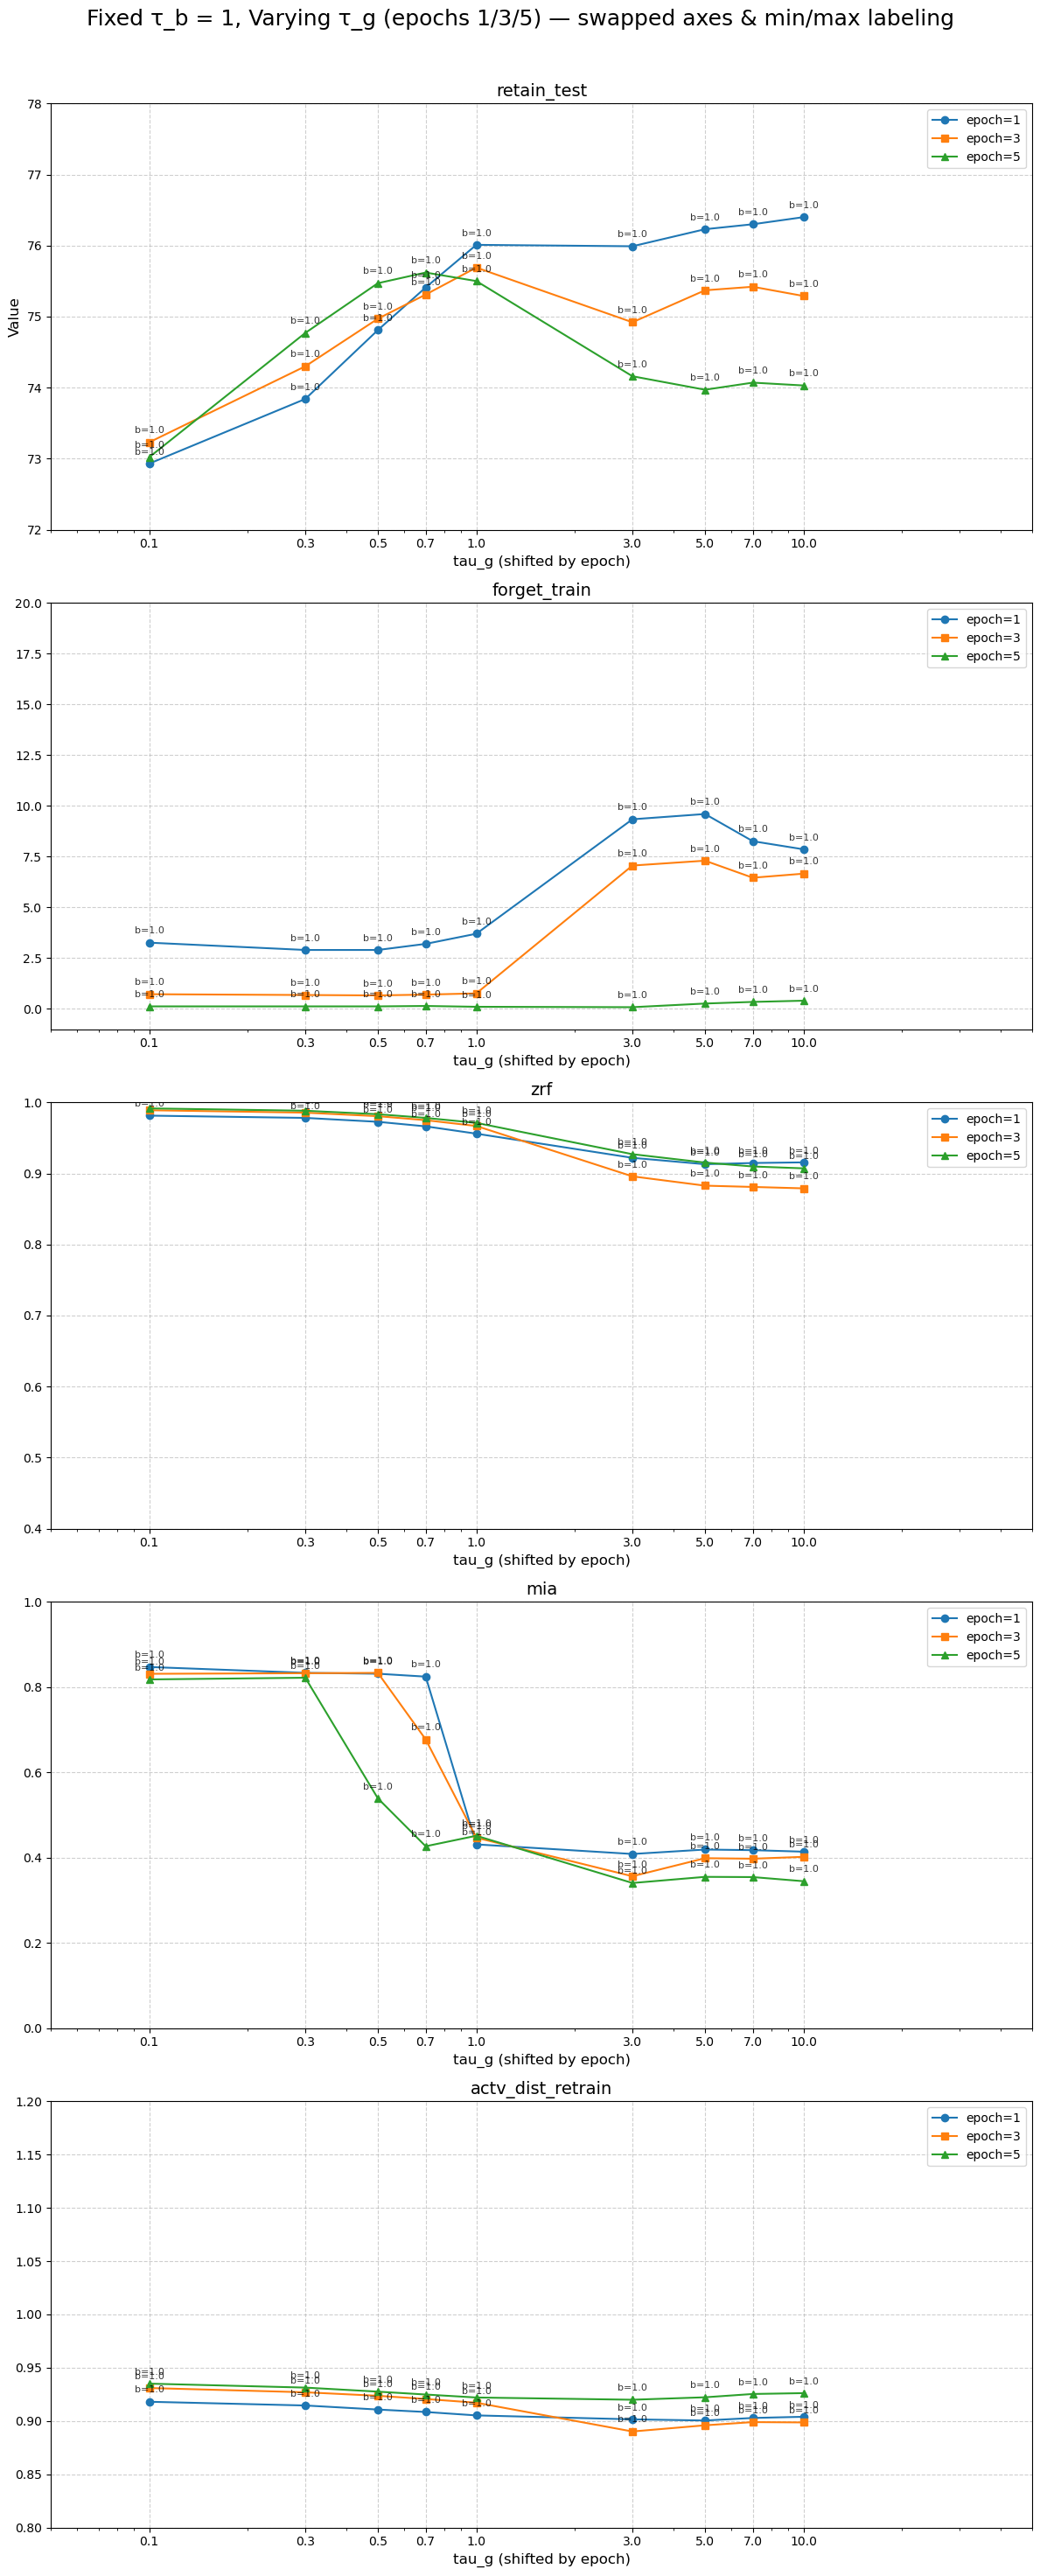

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 로딩
path = '/root/Public_Storage/madelab_khw/kd_tau_class/tau_unlearn.csv'
data = pd.read_csv(path)

# bad_teacher_tau (tau_b) 고정, good_teacher_tau (tau_g)만 변화
fixed_tau_b = 1
filtered_data = data[data["tau_b"] == fixed_tau_b].copy()

# epoch별 서브셋
sub = {ep: filtered_data[filtered_data["epochs"] == ep] for ep in [1, 3, 5]}

metrics = ["retain_test", "forget_train", "zrf", "mia", "actv_dist_retrain"]
scales = {
    "retain_test": (72, 78),
    "forget_train": (-1, 20),
    "zrf": (0.4, 1),
    "mia": (0, 1),
    "actv_dist_retrain": (0.8, 1.2),
}

# x축 눈금 (tau_g)
xticks = [0.1, 0.3, 0.5, 0.7, 1, 3, 5, 7, 10]

# epoch별 x-시프트 (여기서는 ep=1만 쓰지만 에러 방지용)
xshift = {1: 0.0, 3: 0.0, 5: 0.0}

fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 30))

markers = {1: "o-", 3: "s-", 5: "^-"}

for i, m in enumerate(metrics):
    ax = axes[i]

    for ep in [1, 3, 5]:
        df = sub[ep]
        if df.empty:
            continue

        # x축을 tau_g로 사용 (tau_g 변화)
        x = df["tau_g"].astype(float).values + xshift[ep]
        y = df[m].astype(float).values

        ax.plot(x, y, markers[ep], label=f"epoch={ep}")

        # ---- 라벨: tau_g별로 min/max tau_b만 표시 ----
        g = df.groupby("tau_g", as_index=False)
        to_label = []
        for tau_g, gdf in g:
            if gdf.empty:
                continue
            idx_min = gdf["tau_b"].idxmin()
            idx_max = gdf["tau_b"].idxmax()
            to_label.extend([idx_min, idx_max])

        labeled = df.loc[sorted(set(to_label))].copy()
        for _, r in labeled.iterrows():
            xx = float(r["tau_g"]) + xshift[ep]  # tau_g를 x축으로 사용
            yy = float(r[m])
            # 같은 tau_g 내에서 max tau_b 는 위, min tau_b 는 아래로
            is_max = r["tau_b"] == df[df["tau_g"] == r["tau_g"]]["tau_b"].max()
            dy = 6 if is_max else -10
            ax.annotate(f"b={r['tau_b']}", xy=(xx, yy),
                        xytext=(0, dy), textcoords="offset points",
                        ha="center", va="bottom" if is_max else "top",
                        fontsize=8, alpha=0.8, clip_on=True)

    ax.set_title(m, fontsize=14)
    ax.set_xlabel("tau_g (shifted by epoch)", fontsize=12)
    ax.set_ylim(scales[m])
    ax.set_xscale("log")
    ax.set_xlim(0.05, 50)
    ax.set_xticks(xticks)
    ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())  # 로그축에서도 숫자 그대로 표시
    ax.grid(True, linestyle="--", alpha=0.6)
    if i == 0:
        ax.set_ylabel("Value", fontsize=12)
    ax.legend()

plt.suptitle("Fixed τ_b = 1, Varying τ_g (epochs 1/3/5) — swapped axes & min/max labeling", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


/tmp/ipykernel_2631263/3429273285.py:75: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


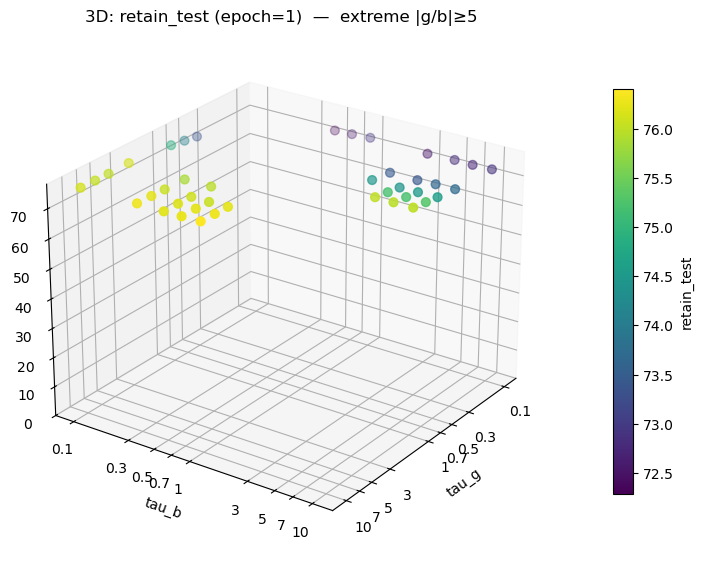

/tmp/ipykernel_2631263/3429273285.py:75: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


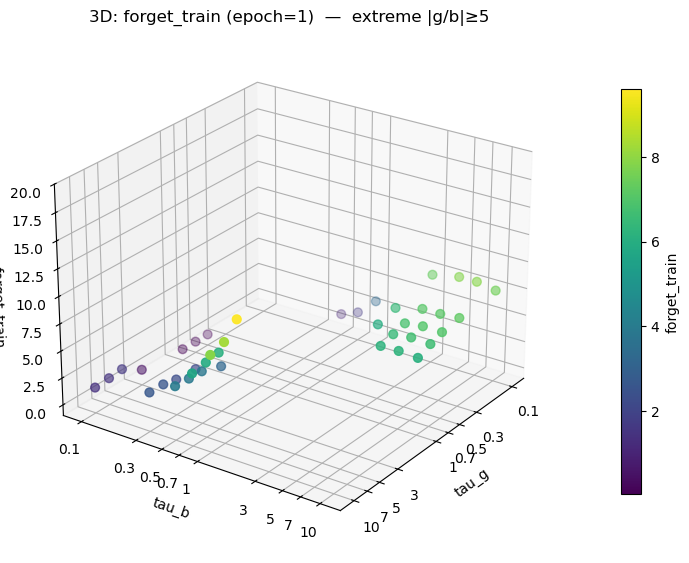

/tmp/ipykernel_2631263/3429273285.py:75: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


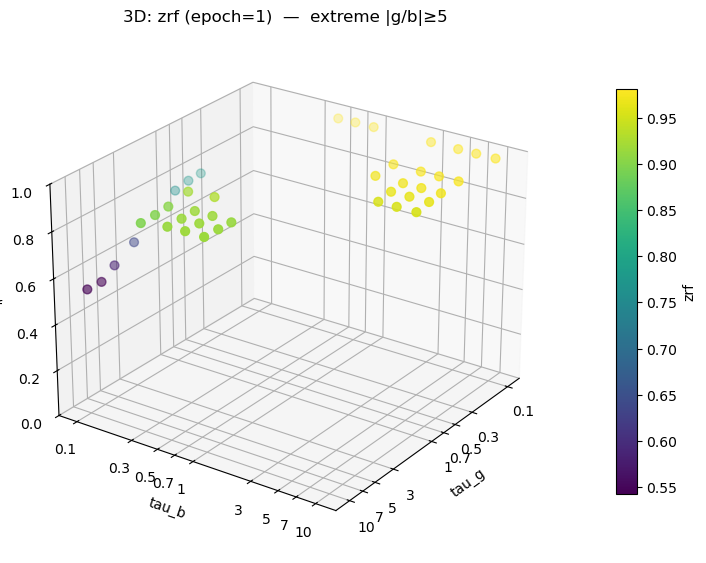

/tmp/ipykernel_2631263/3429273285.py:75: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


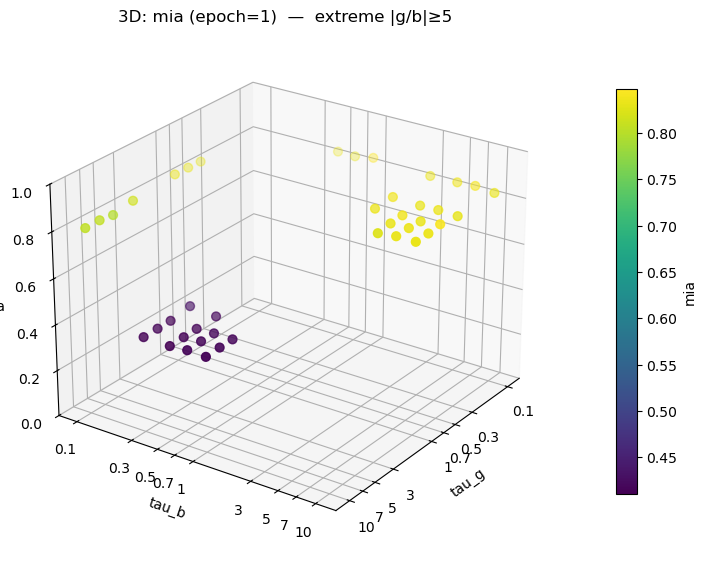

/tmp/ipykernel_2631263/3429273285.py:75: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


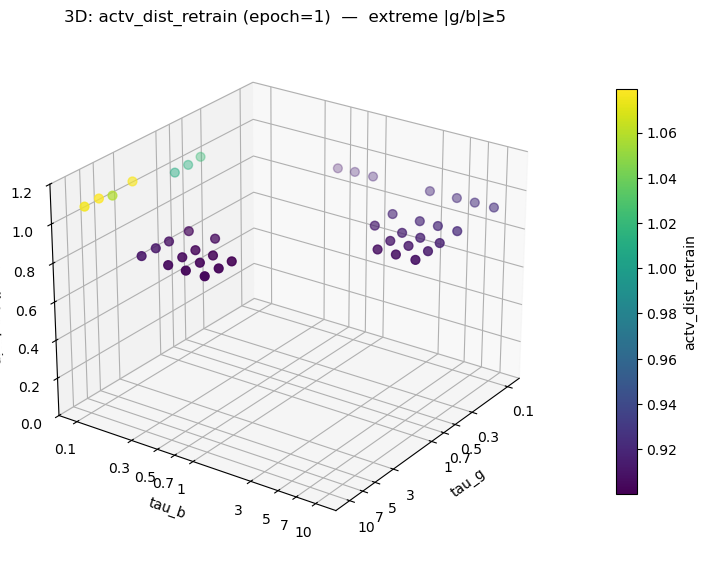

/tmp/ipykernel_2631263/3429273285.py:75: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


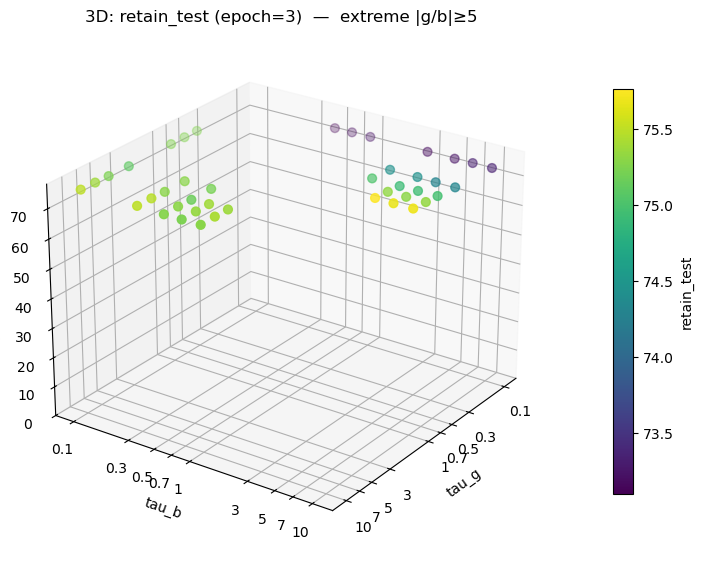

/tmp/ipykernel_2631263/3429273285.py:75: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


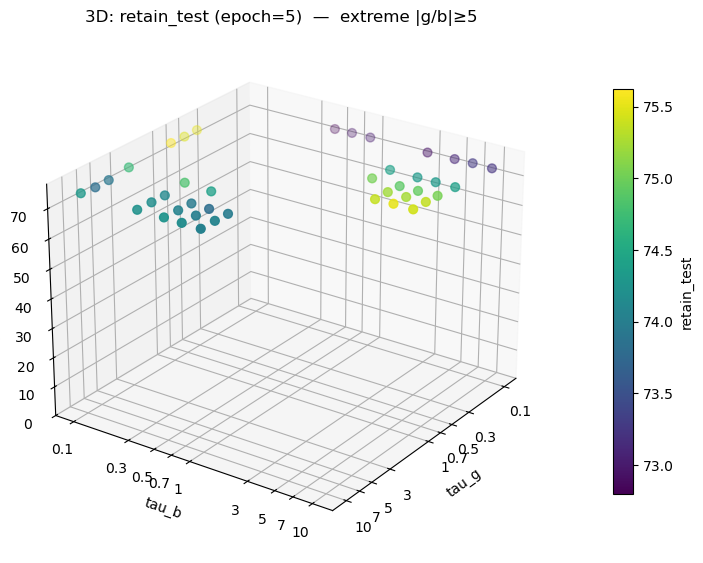

/tmp/ipykernel_2631263/3429273285.py:75: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


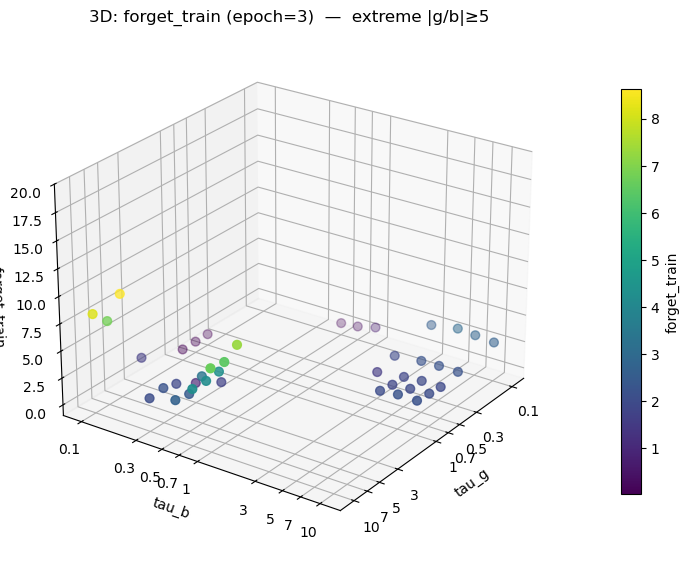

/tmp/ipykernel_2631263/3429273285.py:75: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


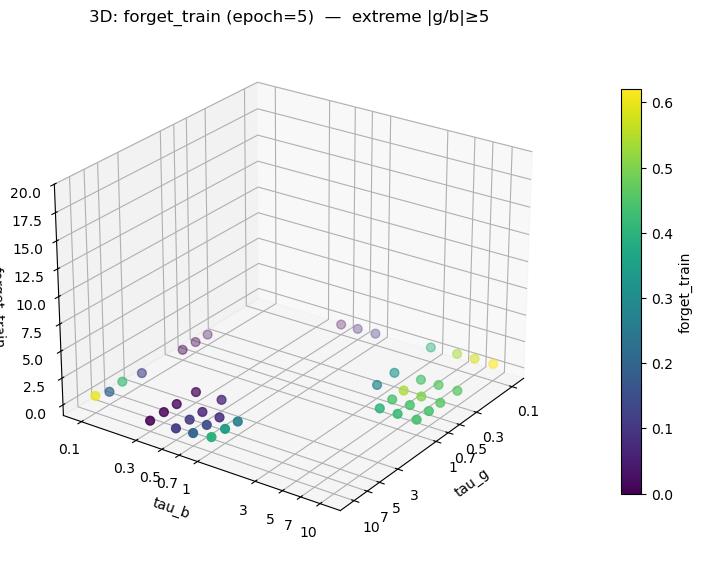

/tmp/ipykernel_2631263/3429273285.py:75: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


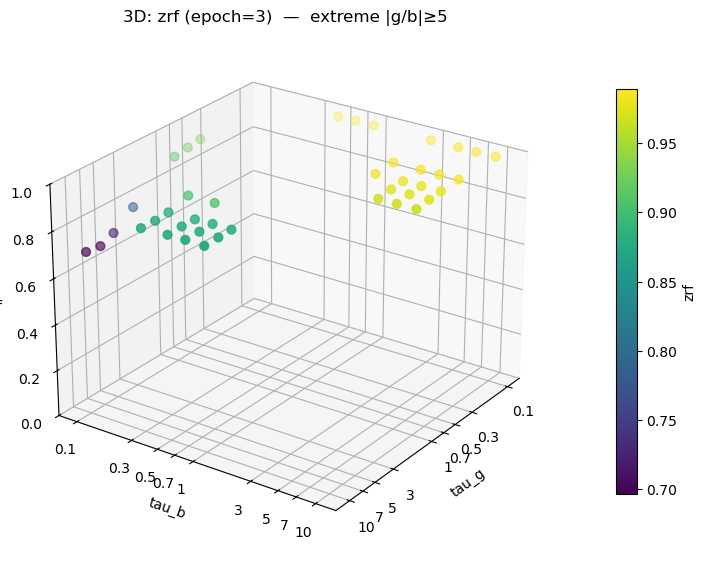

/tmp/ipykernel_2631263/3429273285.py:75: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


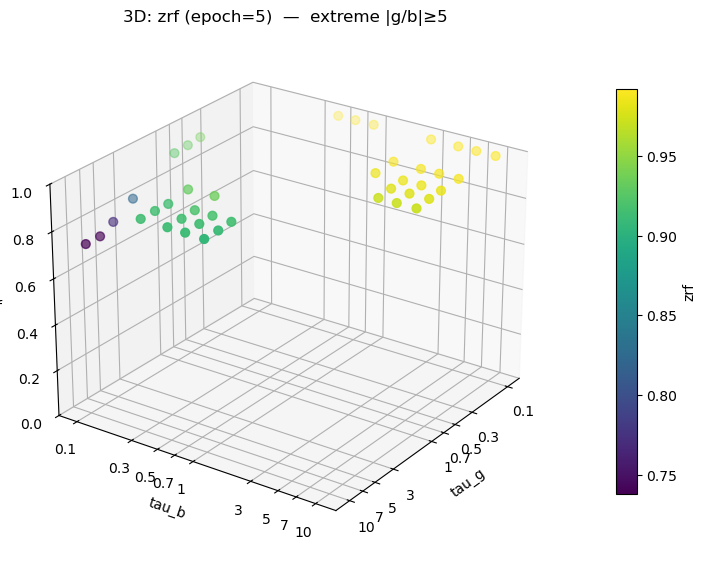

/tmp/ipykernel_2631263/3429273285.py:75: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


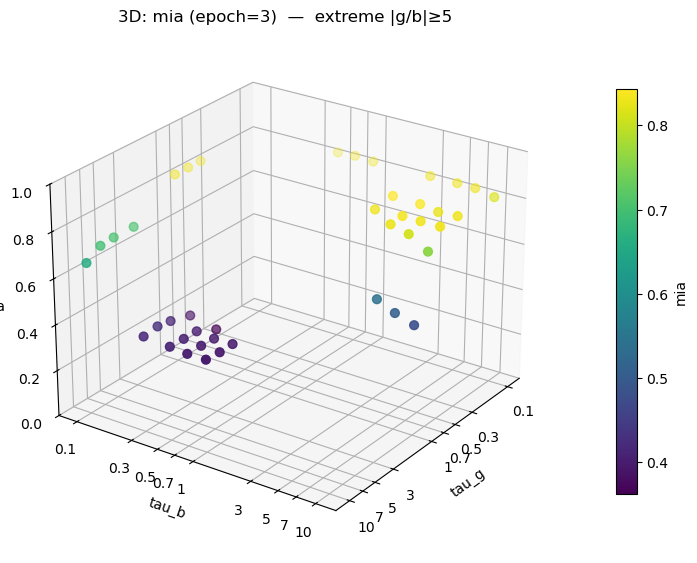

/tmp/ipykernel_2631263/3429273285.py:75: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


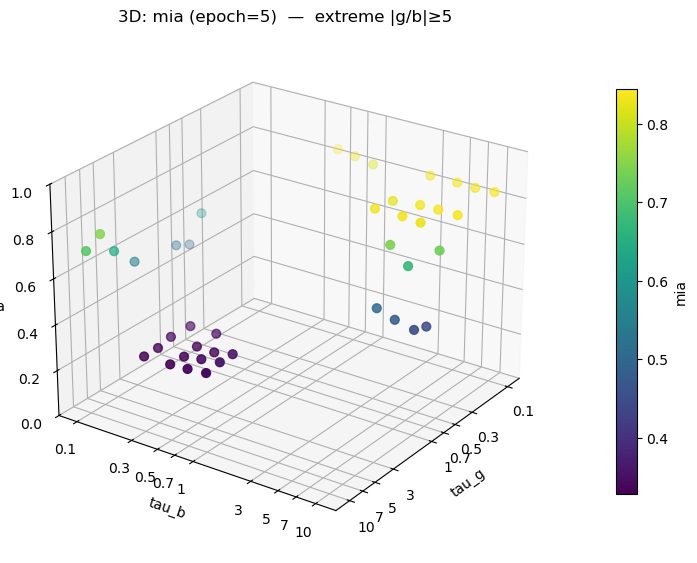

/tmp/ipykernel_2631263/3429273285.py:75: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


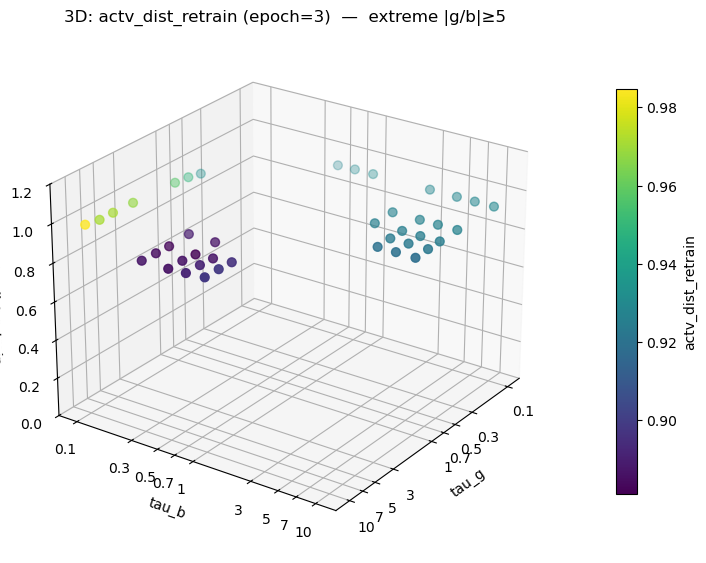

/tmp/ipykernel_2631263/3429273285.py:75: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


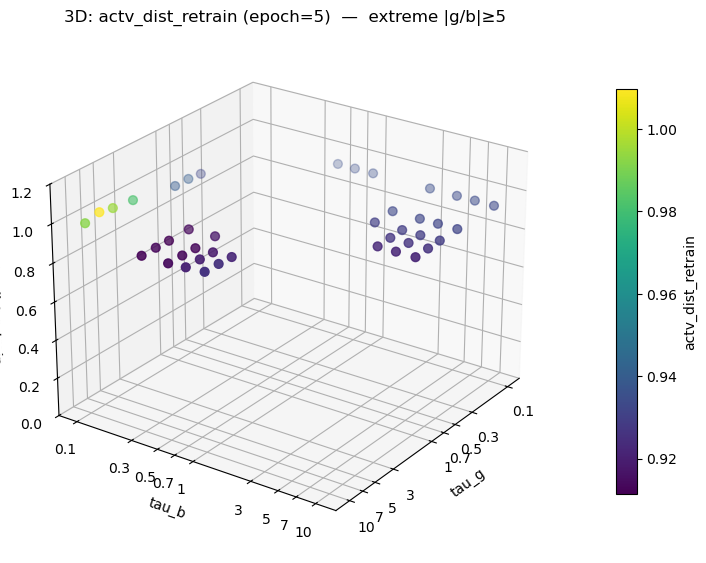

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ===== 데이터 로드 & 극단 조합 필터 =====
path = '/root/Public_Storage/madelab_khw/ksc_unlearning/tau_unlearn.csv'
data = pd.read_csv(path)

ratio_thr = 5
ext = data[(data["tau_g"]/data["tau_b"] >= ratio_thr) | (data["tau_b"]/data["tau_g"] >= ratio_thr)].copy()

# 안전: 숫자 변환 + NaN/inf -> 0
num_cols = ["tau_g","tau_b","epochs","retain_test","forget_test","forget_train","zrf","mia","actv_dist_retrain"]
for c in num_cols:
    ext[c] = pd.to_numeric(ext[c], errors="coerce")
ext.replace([np.inf, -np.inf], np.nan, inplace=True)
for m in ["retain_test","forget_train","zrf","mia","actv_dist_retrain"]:
    ext[m] = ext[m].fillna(0.0)

# ===== 설정 =====
metrics = ["retain_test","forget_train","zrf","mia","actv_dist_retrain"]
scales  = {"retain_test":(72,78),
           "forget_train":(-1,20),
           "zrf":(0.4, 1),
           "mia":(0,1),
           "actv_dist_retrain":(0.8,1.2)}
xticks = [0.1,0.3,0.5,0.7,1,3,5,7,10]

# ===== 3D 그리기 함수 =====
def plot_3d(metric, ep=1, elev=25, azim=35):
    from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (3D 활성화용)

    df = ext[ext["epochs"] == ep].copy()
    if df.empty:
        print(f"[warn] epoch={ep} 데이터 없음")
        return

    # log10 변환으로 3D에서 로그틱 흉내 (레이블은 원래 값으로)
    df["x_log"] = np.log10(df["tau_g"])
    df["y_log"] = np.log10(df["tau_b"])
    z = df[metric].astype(float).values

    fig = plt.figure(figsize=(9, 7))
    ax = fig.add_subplot(111, projection='3d')

    sc = ax.scatter(df["x_log"], df["y_log"], z, c=z, s=40, cmap="viridis")

    # 축 범위 + 여백
    xmin, xmax = df["x_log"].min(), df["x_log"].max()
    ymin, ymax = df["y_log"].min(), df["y_log"].max()
    dx = (xmax - xmin)*0.08 if xmax > xmin else 0.1
    dy = (ymax - ymin)*0.08 if ymax > ymin else 0.1
    ax.set_xlim(xmin - dx, xmax + dx)
    ax.set_ylim(ymin - dy, ymax + dy)

    zlo, zhi = scales[metric]
    zmin = min(zlo, 0.0, float(np.nanmin(z)))
    zmax = max(zhi, float(np.nanmax(z)))
    if zmax <= zmin:
        zmax = zmin + 1e-6
    ax.set_zlim(zmin, zmax)

    # 로그틱 레이블(원래 값 보이도록)
    ax.set_xticks(np.log10(xticks))
    ax.set_yticks(np.log10(xticks))
    ax.set_xticklabels([str(t) for t in xticks])
    ax.set_yticklabels([str(t) for t in xticks])

    ax.set_xlabel("tau_g")
    ax.set_ylabel("tau_b")
    ax.set_zlabel(metric)
    ax.view_init(elev=elev, azim=azim)
    fig.colorbar(sc, ax=ax, pad=0.1, shrink=0.75, label=metric)
    plt.title(f"3D: {metric} (epoch={ep})  —  extreme |g/b|≥{ratio_thr}")
    plt.tight_layout()
    plt.show()

# ===== 실행: epoch=1 기준으로 5개 지표 각각 3D 플롯 =====
for m in metrics:
    plot_3d(m, ep=1)

# 필요하면 다른 epoch도:
for m in metrics:
    plot_3d(m, ep=3)
    plot_3d(m, ep=5)
